In [10]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [67]:
TRAIN_TEST_SPLIT = 0.95
CV = False

In [43]:
data = pd.read_csv('30min_model_data_pi.csv')
#data = pd.read_csv('1h_model_data_pi.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [44]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data = data.iloc[:2149,:]

In [45]:
data

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,PM10_pi_t1,...,PM10_pi_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,PM2.5_pi,PM10_pi,hour,loc
0,3.233333,59.450000,5.908333,13.481667,21.498333,3.700000,55.000000,5.417500,12.042500,19.030000,...,6.715000,25.287500,36.412500,4.877500,12.707500,21.147500,21.600000,35.318333,19.0,0.0
1,2.900000,62.750000,8.778333,21.600000,35.318333,3.233333,59.450000,5.908333,13.481667,21.498333,...,14.282500,24.916667,36.450000,2.866667,4.811667,6.715000,15.685000,24.638333,19.0,0.0
2,2.400000,66.616667,7.168333,15.685000,24.638333,2.900000,62.750000,8.778333,21.600000,35.318333,...,18.664286,24.350000,34.175000,2.905000,8.352500,14.282500,13.623333,21.538333,20.0,0.0
3,2.516667,65.666667,6.118333,13.623333,21.538333,2.400000,66.616667,7.168333,15.685000,24.638333,...,19.030000,9.657143,44.257143,4.638571,11.414286,18.664286,16.098333,24.616667,20.0,0.0
4,2.366667,65.933333,7.891667,16.098333,24.616667,2.516667,65.666667,6.118333,13.623333,21.538333,...,21.498333,3.700000,55.000000,5.417500,12.042500,19.030000,12.885000,19.255000,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,15.066667,61.133333,6.428333,13.158333,20.146667,15.516667,56.816667,4.555000,9.316667,14.263333,...,7.648000,19.383333,35.566667,3.541667,8.205000,13.153333,12.646667,20.095000,18.0,1.0
2145,14.483333,67.166667,5.598333,12.646667,20.095000,15.066667,61.133333,6.428333,13.158333,20.146667,...,6.325000,18.700000,36.600000,2.294000,4.908000,7.648000,8.301667,11.426667,18.0,1.0
2146,14.500000,66.616667,5.065000,8.301667,11.426667,14.483333,67.166667,5.598333,12.646667,20.095000,...,13.065000,18.300000,38.450000,2.526667,4.430000,6.325000,4.986667,8.135000,19.0,1.0
2147,14.250000,63.066667,2.041667,4.986667,8.135000,14.500000,66.616667,5.065000,8.301667,11.426667,...,14.263333,17.583333,43.333333,2.813333,7.736667,13.065000,5.848333,9.706667,19.0,1.0


In [46]:
#Only location B
data = data[data['loc'] == 1.0]

In [48]:
data

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,PM10_pi_t1,...,PM10_pi_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,PM2.5_pi,PM10_pi,hour,loc
1077,6.466667,71.950000,4.536667,8.550000,12.636667,6.816667,70.716667,5.063333,9.581667,14.186667,...,7.016667,5.883333,75.683333,2.111667,2.878333,3.508333,5.592500,9.747500,11.0,1.0
1078,19.725000,44.600000,1.795000,5.592500,9.747500,6.466667,71.950000,4.536667,8.550000,12.636667,...,17.282000,6.066667,75.566667,1.853333,4.356667,7.016667,6.808000,9.516000,12.0,1.0
1079,19.760000,42.820000,4.040000,6.808000,9.516000,19.725000,44.600000,1.795000,5.592500,9.747500,...,10.976667,6.200000,74.080000,4.114000,10.460000,17.282000,8.388750,13.273750,12.0,1.0
1080,7.425000,70.025000,3.757500,8.388750,13.273750,19.760000,42.820000,4.040000,6.808000,9.516000,...,14.186667,6.516667,70.816667,3.590000,7.220000,10.976667,8.153333,12.451667,13.0,1.0
1081,5.950000,71.483333,4.008333,8.153333,12.451667,7.425000,70.025000,3.757500,8.388750,13.273750,...,12.636667,6.816667,70.716667,5.063333,9.581667,14.186667,7.938333,12.386667,13.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,15.066667,61.133333,6.428333,13.158333,20.146667,15.516667,56.816667,4.555000,9.316667,14.263333,...,7.648000,19.383333,35.566667,3.541667,8.205000,13.153333,12.646667,20.095000,18.0,1.0
2145,14.483333,67.166667,5.598333,12.646667,20.095000,15.066667,61.133333,6.428333,13.158333,20.146667,...,6.325000,18.700000,36.600000,2.294000,4.908000,7.648000,8.301667,11.426667,18.0,1.0
2146,14.500000,66.616667,5.065000,8.301667,11.426667,14.483333,67.166667,5.598333,12.646667,20.095000,...,13.065000,18.300000,38.450000,2.526667,4.430000,6.325000,4.986667,8.135000,19.0,1.0
2147,14.250000,63.066667,2.041667,4.986667,8.135000,14.500000,66.616667,5.065000,8.301667,11.426667,...,14.263333,17.583333,43.333333,2.813333,7.736667,13.065000,5.848333,9.706667,19.0,1.0


In [49]:
labels = ['PM2.5_pi', 'PM10_pi']

In [50]:
X = data.drop(labels, axis=1)
y1 = data[labels[0]]
y2 = data[labels[1]]

In [51]:
parameters = {'learning_rate':[0.01, 0.1, 1], 
              'n_estimators':[100, 500, 1000], 
              'max_depth':[2, 3, 4], 
              'colsample_bytree':[0.1, 0.5, 1]}

In [52]:
xgb = XGBRegressor(n_jobs=-1)

In [54]:
search1 = GridSearchCV(xgb, parameters)
search2 = GridSearchCV(xgb, parameters)

In [55]:
if CV:
    search1.fit(X, y1)
    search2.fit(X, y2)
    params1 = search1.best_params_
    params2 = search2.best_params_
else:
    params1 = {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
    params2 = {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [57]:
print("Params 1: ", params1)
print("Params 2: ", params2)

Params 1:  {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
Params 2:  {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


In [68]:
n = int(TRAIN_TEST_SPLIT*data.shape[0])

X_train = data.iloc[:n,:]
X_test = data.iloc[n:,:]

y_train1 = X_train[labels[0]]
y_train2 = X_train[labels[1]]

y_true1 = X_test[labels[0]]
y_true2 = X_test[labels[1]]

X_train = X_train.drop(labels, axis=1)
X_test = X_test.drop(labels, axis=1)

In [69]:
model1 = XGBRegressor(**params1)
model1.fit(X_train.values, y_train1.values)
y_pred1 = model1.predict(X_test.values)
mse1 = mean_squared_error(y_true1, y_pred1)
mae1 = mean_absolute_error(y_true1, y_pred1)
print("MSE: {}".format(mse1))
print("MAE: {}".format(mae1))

MSE: 8.188214345251666
MAE: 2.1499602493945464


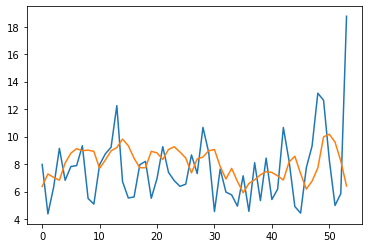

In [70]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.show()

In [71]:
model2 = XGBRegressor(**params2)
model2.fit(X_train.values, y_train2.values)
y_pred2 = model2.predict(X_test.values)
mse2 = mean_squared_error(y_true2, y_pred2)
mae2 = mean_absolute_error(y_true2, y_pred2)
print("MSE: {}".format(mse2))
print("MAE: {}".format(mae2))

MSE: 20.536518040948742
MAE: 3.3942757682329336


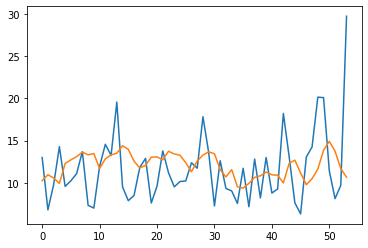

In [72]:
plt.plot(np.arange(len(y_true2)), y_true2)
plt.plot(np.arange(len(y_pred2)), y_pred2)
plt.show()

In [73]:
#Comparison with simple Ridge model
ridge = Ridge(alpha=2e-05)
ridge.fit(X_train.values, y_train1.values)
preds = ridge.predict(X_test.values)
mse = mean_squared_error(y_true1, preds)
mae = mean_absolute_error(y_true1, preds)
print("MSE: {}".format(mse))
print("MAE: {}".format(mae))

MSE: 7.890145285838049
MAE: 2.1275400130163624


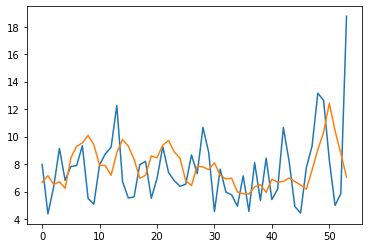

In [74]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(preds)), preds)
plt.show()

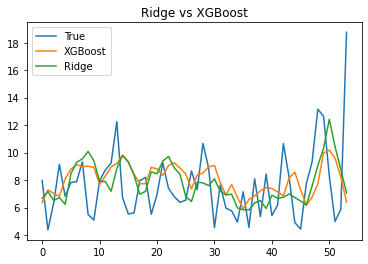

In [75]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.plot(np.arange(len(preds)), preds)
plt.title("Ridge vs XGBoost")
plt.legend(['True', 'XGBoost', 'Ridge'])
plt.show()

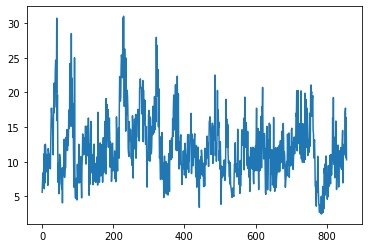

In [66]:
plt.plot(np.arange(len(y_train1)), y_train1)
plt.show()

In [41]:
X_train

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,PM10_pi_t1,...,hum_pi_t4,PM1_pi_t4,PM2.5_pi_t4,PM10_pi_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,hour
0,3.233333,59.450000,5.908333,13.481667,21.498333,3.700000,55.000000,5.417500,12.042500,19.030000,...,36.450000,2.866667,4.811667,6.715000,25.287500,36.412500,4.877500,12.707500,21.147500,19.0
1,2.900000,62.750000,8.778333,21.600000,35.318333,3.233333,59.450000,5.908333,13.481667,21.498333,...,34.175000,2.905000,8.352500,14.282500,24.916667,36.450000,2.866667,4.811667,6.715000,19.0
2,2.400000,66.616667,7.168333,15.685000,24.638333,2.900000,62.750000,8.778333,21.600000,35.318333,...,44.257143,4.638571,11.414286,18.664286,24.350000,34.175000,2.905000,8.352500,14.282500,20.0
3,2.516667,65.666667,6.118333,13.623333,21.538333,2.400000,66.616667,7.168333,15.685000,24.638333,...,55.000000,5.417500,12.042500,19.030000,9.657143,44.257143,4.638571,11.414286,18.664286,20.0
4,2.366667,65.933333,7.891667,16.098333,24.616667,2.516667,65.666667,6.118333,13.623333,21.538333,...,59.450000,5.908333,13.481667,21.498333,3.700000,55.000000,5.417500,12.042500,19.030000,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,16.316667,39.333333,5.598333,10.020000,14.450000,17.033333,37.883333,4.436667,7.866667,11.288333,...,33.600000,6.895000,15.100000,23.725000,19.200000,31.750000,3.745000,8.953333,14.503333,19.0
1715,15.633333,41.683333,6.051667,13.171667,20.650000,16.316667,39.333333,5.598333,10.020000,14.450000,...,35.400000,4.735000,9.936667,15.363333,18.733333,33.600000,6.895000,15.100000,23.725000,19.0
1716,14.966667,42.750000,6.140000,10.508333,14.813333,15.633333,41.683333,6.051667,13.171667,20.650000,...,36.616667,4.728333,5.953333,6.808333,18.166667,35.400000,4.735000,9.936667,15.363333,20.0
1717,14.483333,43.750000,7.438333,15.573333,24.063333,14.966667,42.750000,6.140000,10.508333,14.813333,...,37.883333,4.436667,7.866667,11.288333,17.566667,36.616667,4.728333,5.953333,6.808333,20.0
